In [37]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
from pandarallel import pandarallel

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [8]:
fname = '../../figures/fig_4_sample_major/triplet_sample_pi_tpm.tsv'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'

In [9]:
df = pd.read_csv(fname, sep='\t')
major_df = pd.read_csv(major_isos, sep='\t')

In [31]:
df = df.loc[(df.gname=='E4F1')&(df['sample']=='panc1')]
major_df = major_df.loc[(major_df.gname=='E4F1')&(major_df['sample']=='panc1')]

In [32]:
df

,tid,sample,triplet_tpm,triplet_pi,gid,gname,triplet_rank
932692,"ENSG00000167967[1,1,1]",panc1,27.319420,46.551723,ENSG00000167967,E4F1,1
932693,"ENSG00000167967[1,15,1]",panc1,13.153794,22.413794,ENSG00000167967,E4F1,2
932694,"ENSG00000167967[1,14,1]",panc1,8.094643,13.793103,ENSG00000167967,E4F1,3
932695,"ENSG00000167967[1,13,1]",panc1,6.070982,10.344828,ENSG00000167967,E4F1,4
932696,"ENSG00000167967[1,17,1]",panc1,2.023661,3.448276,ENSG00000167967,E4F1,5
932697,"ENSG00000167967[1,10,1]",panc1,1.011830,1.724138,ENSG00000167967,E4F1,6
932698,"ENSG00000167967[1,12,1]",panc1,1.011830,1.724138,ENSG00000167967,E4F1,7


In [33]:
major_df

,tid,gname,gid,sample,pi,pi_rank
544971,"ENSG00000167967[1,1,1]",E4F1,ENSG00000167967.15,panc1,46.551723,1
815827,"ENSG00000167967[1,15,1]",E4F1,ENSG00000167967.15,panc1,22.413794,2
1005807,"ENSG00000167967[1,14,1]",E4F1,ENSG00000167967.15,panc1,13.793103,3
1119330,"ENSG00000167967[1,13,1]",E4F1,ENSG00000167967.15,panc1,10.344828,4


In [44]:
df['major'] = False
df.loc[df.tid.isin(major_df.tid.tolist()), 'major'] = True
df.triplet_rank = df.triplet_rank.astype('category')

In [59]:
c_dict, _ = get_biosample_colors()
c1 = c_dict['panc1']
c2 = get_not_det_color()
c_dict = {True: c1, False: c2}
colors = [c_dict[c] for c in df.sort_values(by='triplet_rank', ascending=False).major.values]
          
    

In [74]:
# import matplotlib as mpl
# sns.set_context('paper', font_scale=1.8)
# ax = plt.gca()
# ax.bar(x=df.triplet_rank.tolist(),
#                   height=df.triplet_pi.tolist(),
#                   color=colors)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # ax.legend()

# xlabel = 'Ranked transcripts'
# ylabel = 'Pi value of transcript'

# _ = ax.set(xlabel=xlabel, ylabel=ylabel)

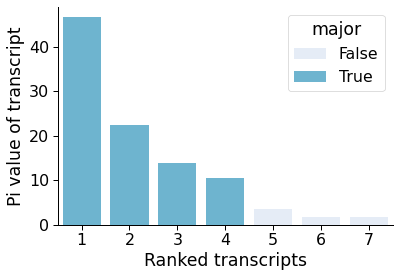

In [73]:
ax = sns.barplot(df, x='triplet_rank', y='triplet_pi',
            hue='major', palette=c_dict, dodge=False, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# ax.legend()

xlabel = 'Ranked transcripts'
ylabel = 'Pi value of transcript'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)